F:\EXTRA_COURSES\DATA_ANALYTICS\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Precision: 0.84
Recall:    0.54
F1 Score:  0.65
ROC AUC:   0.95
Confusion Matrix:
[[71066    13]
 [   57    66]]

--- Random Forest ---
Precision: 0.98
Recall:    0.45
F1 Score:  0.61
ROC AUC:   0.95
Confusion Matrix:
[[71078     1]
 [   68    55]]

--- XGBoost ---
Precision: 0.97
Recall:    0.74
F1 Score:  0.84
ROC AUC:   0.94
Confusion Matrix:
[[71076     3]
 [   32    91]]


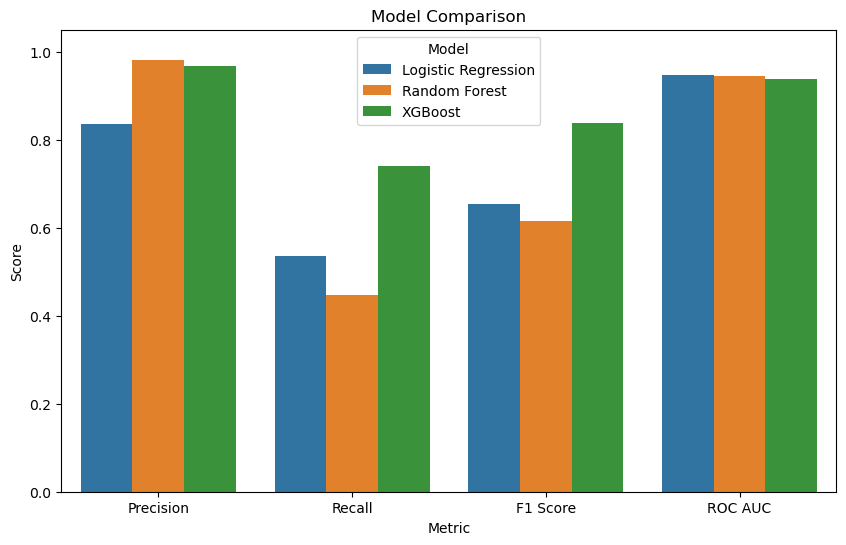

In [6]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

import pickle

# 2. Load and preprocess data
df = pd.read_csv(r"F:\\EXTRA_COURSES\Projects\creditcard.csv")  # Replace with your path

# Assuming target = 'isFraud'
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 3. Train Models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 4. Predict probabilities and apply threshold
threshold = 0.90

def predict_with_threshold(model, X, threshold):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int), probs

lr_preds, lr_probs = predict_with_threshold(lr, X_test, threshold)
rf_preds, rf_probs = predict_with_threshold(rf, X_test, threshold)
xgb_preds, xgb_probs = predict_with_threshold(xgb, X_test, threshold)

# 5. Evaluation Function
def evaluate_model(name, y_true, y_pred, probs):
    print(f"\n--- {name} ---")
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, probs)
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    print(f"ROC AUC:   {roc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    return {
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc
    }

# 6. Evaluate all models
results = []
results.append(evaluate_model("Logistic Regression", y_test, lr_preds, lr_probs))
results.append(evaluate_model("Random Forest", y_test, rf_preds, rf_probs))
results.append(evaluate_model("XGBoost", y_test, xgb_preds, xgb_probs))

# 7. Convert results to DataFrame and visualize
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.ylim(0, 1.05)
plt.show()

# 8. Save best model (XGBoost)
with open('xgboost_fraud_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Optionally, save evaluation results
results_df.to_csv("model_comparison_results.csv", index=False)